# CS342 Machine Learning
## Lab 6: Autoencoders and denoising autoencoders

### Department of Computer Science, University of Warwick

In this lab, you will create an autoencoder using the MNIST dataset, a widely-used dataset of hand-written digits. We will be working with the ```mnist_train_x.npy``` and ```mnist_test_x.npy``` data.

The datasets for this lab are larger than those for previous labs. Therefore, we will load the data directly from the module directory, as shown below. If you would like to work on the lab using your own machine, copy the data across by running the following command in a terminal window.

```scp USERNAME@login-3.dcs.warwick.ac.uk:/modules/cs342/2019/lab6/data/* .```

After entering your DCS password, this will copy the data to your current working directory.

# Part 1: Autoencoders

 The MNIST dataset consists of 60,000 training greyscale images and 5,000 test greyscale images of 28 by 28 pixels hand-written digits. As autoencoders are an unsupervised learning technique, in part 1 we will be working with the training set only. The images in both training and test sets are represented as integers between 0 and 255. *__Please note__: The training and test split used in this lab is not the standardized split you may find in other copies of the dataset online.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix as c_matrix
from keras.datasets import mnist


data_path = '/modules/cs342/2019/lab6/data/'
mnist_train_x = np.load(data_path + 'mnist_train_x.npy')
print('MNIST train set shape: ', mnist_train_x.shape)

Using TensorFlow backend.
/local/java/python-pip-packages.cs342/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/local/java/python-pip-packages.cs342/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/local/java/python-pip-packages.cs342/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/loca

MNIST train set shape:  (60000, 28, 28)


## 1. Display images from the MNIST dataset (5 marks)
Create a function, ```display_mnist()```, to display the first 5 images from the ```mnist_train_x.npy``` dataset side-by-side. Ensure the figure is displayed at an appropriate size in the notebook. 

In [2]:
def display_mnist(data):
    fig = plt.figure(figsize=(12,12))
    for i in range(5):
        axe = fig.add_subplot(1,5,i+1)
        plt.imshow(data[i].reshape(28,28), cmap = 'gray')
    plt.show()

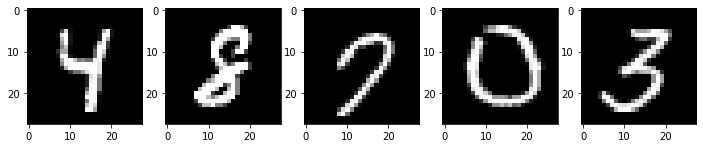

In [3]:
display_mnist(mnist_train_x)

In [4]:
mnist_train_x.shape

(60000, 28, 28)

## 2. Create a non-linear autoencoder which reduces images in the MNIST dataset to a latent representation of 64 dimensions (35 marks)

Using the Keras library, design a non-linear autoencoder that reduces the original MNIST images in the ```mnist_train_x.npy``` file to a dimension of 64 before reconstructing the original images. Use your ```display_mnist()``` function to display the first 5 reconstructed images from the ```mnist_train_x.npy``` dataset.
#### Requirements
1. The autoencoder must use only ```Dense``` layers.
2. The autoencoder must use 4 layer in total, 3 hidden layers and 1 output layer.
3. The autoencoder must be trained for 10 epochs.
4. Use the 'relu' activation function for each hidden layer. This activation function is an alternative to the traditional Sigmoid function and can help a neural network converge. This  'relu' activation function  will be introduced in the lectures in Week 7. 
5. Use Stochastic Gradient Decent (SGD) as the optimization method.
6. Both inputs and outputs should be scaled to the range 0 to 1. Use an appropriate activation function for the output layer.
7. Use the the 'binary_crossentropy' loss function, which is a loss function for values scaled to the range 0 to 1.
8. Use a batch size of 16.
9. The output layer should reconstruct the original images of dimension 784.
9. Choose a suitable value for learning rate and number of neurons for the hidden layers.

In [5]:
x_train = np.reshape(mnist_train_x, (60000,784))/255

learning = [1]

for i in learning:
    
    sgd = SGD(learning_rate=i)
    autoencoder = Sequential()

    autoencoder.add(Dense(128, use_bias='true', activation='relu', input_dim = 784))
    autoencoder.add(Dense(64, use_bias='true', activation='relu'))
    autoencoder.add(Dense(128, use_bias='true', activation='relu'))
    autoencoder.add(Dense(784, use_bias='true', activation='sigmoid'))

    autoencoder.compile(loss='binary_crossentropy', optimizer=sgd , metrics=['accuracy'])

    autoencoder.fit(x_train, x_train, epochs=10, batch_size=16, verbose=1)

    img = autoencoder.predict(x_train[:5])


display_mnist(img)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.1717 - accuracy: 0.8012
Epoch 2/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1113 - accuracy: 0.8121
Epoch 3/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0994 - accuracy: 0.8134
Epoch 4/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0936 - accuracy: 0.8139
Epoch 5/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0897 - accuracy: 0.8142
Epoch 6/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0870 - accuracy: 0.8144
Epoch 7/10
60000/60000 [==============================] - 11s 192us/step - loss: 0.0850 - accuracy: 0.8146
Epoch 8/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0836 - accuracy: 0.8147
Epoch 9/10
60000/60000 [============================

KeyboardInterrupt: 

## 3. Explain how modifying the learning rate impacts results (10 marks)

In a Jupyter markdown block (i.e. text block), explain how modifying the learning rate of SGD may change the results obtained in question 2. Why is it necessary to choose an appropriate learning rate in SGD?

_Exercise 3 discussion_

_We can notice that increasing the learning rate makes the images clearer. This is because the learning rate influences the speed of convergence of the neural network.
A high value will make it converge more quickly than a smaller value._

## 4. Create an autoencoder which reduces images in the MNIST dataset to a latent representation of 1 dimension (5 marks)
Modify the non-linear autoencoder in question 2 to compute latent representations of 1 dimension. Use the ```display_mnist()``` to display the first 5 reconstructed images from the ```mnist_train_x.npy``` dataset.

In [ ]:
for i in learning:
    
    sgd = SGD(learning_rate=i)
    autoencoder = Sequential()

    autoencoder.add(Dense(64, use_bias='true', activation='relu', input_dim = 784))
    autoencoder.add(Dense(1, use_bias='true', activation='relu'))
    autoencoder.add(Dense(64, use_bias='true', activation='relu'))
    autoencoder.add(Dense(784, use_bias='true', activation='sigmoid'))

    autoencoder.compile(loss='binary_crossentropy', optimizer=sgd , metrics=['accuracy'])

    autoencoder.fit(x_train, x_train, epochs=10, batch_size=16, verbose=1)

    score = autoencoder.evaluate(x_train, x_train, batch_size=16)
    print (score)

    img = autoencoder.predict(x_train[:5])


    n = 5  # how many digits we will display
    plt.figure(figsize=(12, 12))
    for i in range(n):
    # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## 5. Contrast your results in questions 4 and 2. Discuss any differences you observe (5 marks)
How do the reconstructed images in question 2 compare to those reconstructed by using the non-linear autoencoder in question 4? In a Jupyter markdown block (i.e. text block), please explain your observations.

_Exercise 5 discussion_

_The fact that the NN is reduce to a 1 neuron layer is not optimal as a lot of information is lost there, as the results show. This because all precedent neurons are given the same information in the next layer._

# Part 2: Denoising autoencoders

In this section, you will create a non-linear denoising autoencoder. 
Use your ```display_mnist()``` function to display the first 5 images from the ```mnist_test_x.npy``` dataset. You will notice that these images have been corrupted with noise. We will use a non-linear denoising autoencoder to attempt to remove the noise.

In [ ]:
mnist_test_x = np.load(data_path + '/mnist_test_x.npy')
print('MNIST test set shape: ', mnist_test_x.shape)

To remove the noise form the test dataset ```mnist_test_x.npy```, we can use supervised learning. If we have a noisy image and a corresponding clean image, we can train a supervised learning model to predict the clean image, given the noisy image. However, we do not have any clean image for our test set, so how will we train a model? Fortunately, you know that the noisy images have been generated by adding Gaussian noise with a mean of 127 and a variance of 500. This means we can generate new training data by adding noise to the clean training images. This way, we have a correspondence between clean and noisy images, which we can use to train a supervised learning model. Once the model is trained, we can use it to de-noise the noisy test dataset, for which we do not have the ground truth. 

To summarize, you should proceed as follows:


1. Add Gaussian noise to the clean training data to generate noisy training data.
2. Train a supervised learning model using the generated noisy training data as input and clean training data as the targets.
3. Run the trained model using the noisy test data as inputs to recover the clean test dataset.


## 6. Add Gaussian noise to the training images (10 marks)

Create a function to add Gaussian noise with mean 127 and variance 500 to each image in the original ```mnist_train_x.npy``` dataset. Use the ```display_mnist()``` function to display the first 5 images with added noise, and verify that they appear similar to the images in the ```mnist_test_x.npy``` dataset.

In [ ]:
import numpy as np

def Add_Gnoise(data):
    

    mean = 127
    var = 500
    sigma = var**0.5

    row,col,ch= data.shape
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy_imgs = data + gauss
    return noisy_imgs

    

display_mnist(Add_Gnoise(mnist_train_x))
    

## 7. Train a non-linear denoising autoencoder using the generated noisy train images (25 marks)

Using the same autoencoder architecture as in question 2 (with a latent representation of 64 dimensions), train a denoising autoencoder to take a noisy image as input and output a denoised version of the same image.

In [ ]:
noisy_imgs = np.reshape(Add_Gnoise(mnist_train_x),(60000,784))/255

sgd = SGD(learning_rate=1)
autoencoder2 = Sequential()

autoencoder2.add(Dense(128, use_bias='true', activation='relu', input_dim = 784))
autoencoder2.add(Dense(64, use_bias='true', activation='relu'))
autoencoder2.add(Dense(128, use_bias='true', activation='relu'))
autoencoder2.add(Dense(784, use_bias='true', activation='sigmoid'))

autoencoder2.compile(loss='binary_crossentropy', optimizer=sgd , metrics=['accuracy'])

autoencoder2.fit(noisy_imgs, x_train, epochs=10, batch_size=16, verbose=1)

score = autoencoder2.evaluate(noisy_imgs, x_train, batch_size=16)
print (score)

img = autoencoder2.predict(noisy_imgs[:5])


n = 5  # how many digits we will display
plt.figure(figsize=(12, 12))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img[i].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 8. Denoise the images in the test set (5 marks)

Use the trained model to de-noise the images in the test set (```mnist_test_x.npy```) and display the first 5 images with the ```display_mnist()``` function. Save the entire denoised dataset in a file called ```mnist_test_x_denoised.npy```. We will use these images in lab 7.

In [ ]:
x_test = np.reshape(mnist_test_x, (5000,784))/255


sgd = SGD(learning_rate=1)
autoencoder1 = Sequential()

autoencoder1.add(Dense(128, use_bias='true', activation='relu', input_dim = 784))
autoencoder1.add(Dense(64, use_bias='true', activation='relu'))
autoencoder1.add(Dense(128, use_bias='true', activation='relu'))
autoencoder1.add(Dense(784, use_bias='true', activation='sigmoid'))

autoencoder1.compile(loss='binary_crossentropy', optimizer=sgd , metrics=['accuracy'])

autoencoder1.fit(noisy_imgs, x_train, epochs=10, batch_size=16, verbose=1)

mnist_test_x_denoised = autoencoder1.predict(x_test)

np.save('mnist_test_x_denoised.npy', mnist_test_x_denoised)

In [ ]:
display_mnist(mnist_test_x_denoised[:5])